In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("Student Mental health.csv")
df.head(5)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [11]:
new_columns = ['Time','Gender','Age','Major','Year','CGPA','Marriage','Depression','Anxiety','Panic','Treatment']
df.columns = new_columns
df.head()

,Time,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [52]:
df.describe()

,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.250000,20.53000,17.190000,1.980000,4.310000,0.160000,0.350000,0.340000,0.330000,0.060000
std,0.435194,2.49628,14.017086,0.994734,0.884148,0.368453,0.479372,0.476095,0.472582,0.238683
min,0.000000,18.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.00000,4.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,19.00000,17.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,23.00000,28.000000,3.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,24.00000,48.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.duplicated().sum()

0

In [14]:
df.isna().sum()
df.dropna(inplace=True)
df.isna().sum()

Time          0
Gender        0
Age           0
Major         0
Year          0
CGPA          0
Marriage      0
Depression    0
Anxiety       0
Panic         0
Treatment     0
dtype: int64

Text(0, 0.5, 'Frequency')

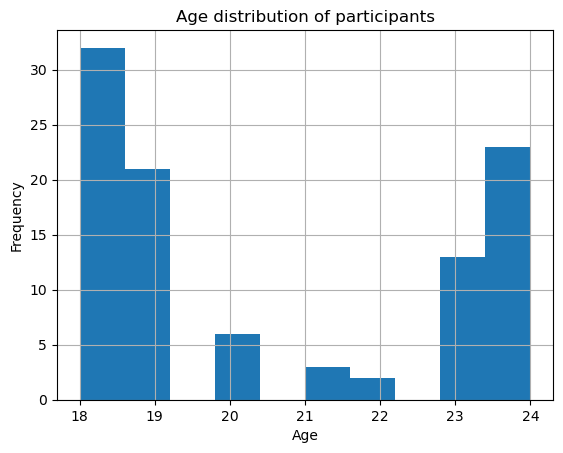

In [15]:
df['Age'].hist()
plt.title('Age distribution of participants')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Depression by Age')

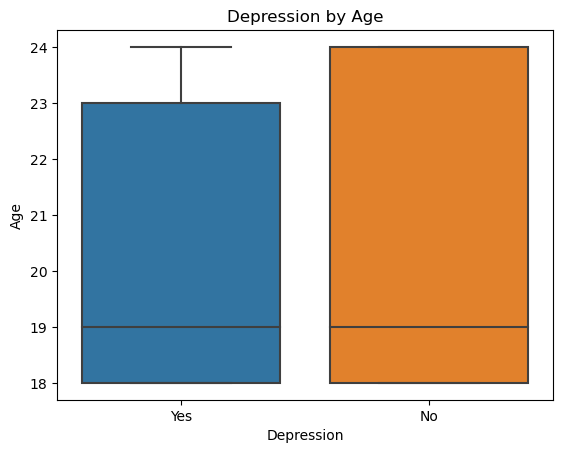

In [16]:
sns.boxplot(data=df,x='Depression',y='Age')
plt.title('Depression by Age')

Text(0.5, 1.0, 'CGPA distribution')

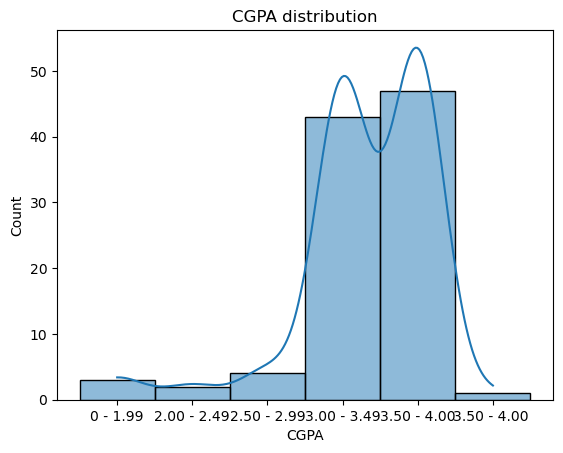

In [17]:
sns.histplot(df['CGPA'].sort_values(),kde=True)
plt.title('CGPA distribution')

Text(0.5, 1.0, 'Depression frequency')

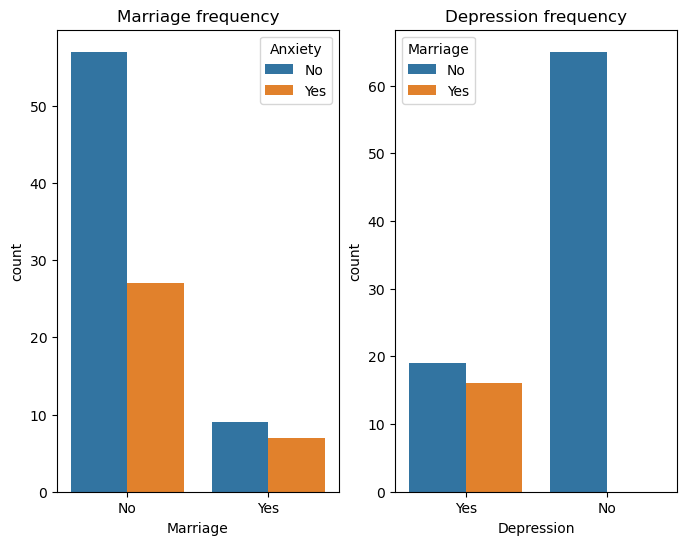

In [18]:
fig = plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.countplot(data=df,x='Marriage',hue='Anxiety')
plt.title('Marriage frequency')

plt.subplot(1,2,2)
sns.countplot(data=df, x= 'Depression',hue='Marriage')
plt.title("Depression frequency")

In [19]:
df.head()

,Time,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [56]:
cols = ['Marriage','Depression','Panic','Anxiety','Treatment']

def check(x):
    if x == 'Yes':
        return 1
    else:
        return 0

for i in cols:
    df[i] = df[i].apply(lambda x:1 if x =='Yes' else 0)

In [21]:
df['Year']=df['Year'].apply(lambda x: int(x[-1:])) #Turn the string to int
df

,Time,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,1,3.50 - 4.00,0,0,1,0,0
97,13/07/2020 21:21:42,Male,18.0,Engineering,2,3.00 - 3.49,0,1,1,0,0
98,13/07/2020 21:22:56,Female,19.0,Nursing,3,3.50 - 4.00,1,1,0,1,0
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,4,3.50 - 4.00,0,0,0,0,0


In [22]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [23]:
df['CGPA'].value_counts().sort_values()

def change_cgpa(x):
    if (x == '3.50 - 4.00' or x == '3.50 - 4.00 '):
        x = 5
        return x
    elif x=='3.00 - 3.49' :
        x = 4
        return x
    elif x == '2.50 - 2.99':
        x = 3
        return x
    elif x== '2.00 - 2.49':
        x = 2
        return x
    else:
        x=1
        return x

df['CGPA']=df['CGPA'].apply(lambda x:change_cgpa(x))

In [24]:
df.head()

,Time,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,4,0,1,0,1,0
1,8/7/2020 12:04,Male,21.0,Islamic education,2,4,0,0,1,0,0
2,8/7/2020 12:05,Male,19.0,BIT,1,4,0,1,1,1,0
3,8/7/2020 12:06,Female,22.0,Laws,3,4,1,1,0,0,0
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,4,0,0,0,0,0


In [25]:
# 0 for female, 1 for male
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Female' else 1)

In [26]:
df['Major'].value_counts()

Major
BCS                        18
Engineering                17
BIT                         9
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Huma

In [58]:
from sklearn.preprocessing import  LabelEncoder
le = LabelEncoder()
df['Major'] = le.fit_transform(df['Major'])

In [28]:
df.drop('Time',axis=1,inplace=True)

In [29]:
df.head()

,Gender,Age,Major,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,0,18.0,17,1,4,0,1,0,1,0
1,1,21.0,25,2,4,0,0,1,0,0
2,1,19.0,4,1,4,0,1,1,1,0
3,0,22.0,33,3,4,1,1,0,0,0
4,1,23.0,37,4,4,0,0,0,0,0


In [30]:
# Splitting the data
from sklearn.model_selection import train_test_split

X=df.drop(['Depression'],axis=1).values
y=df['Depression'].values

X.shape,y.shape


((100, 9), (100,))

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 9), (20, 9), (80,), (20,))

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_X_train = scaler.fit_transform(X_train)
norm_X_test = scaler.transform(X_test)

In [33]:
len(X_train),len(norm_X_train)
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential

In [34]:
# baseline model
model = Sequential([
    tf.keras.layers.Input(shape=(9,)),
    Dense(9),
    Dense(18,activation='relu'),
    Dense(9,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train,y_train,validation_data=[X_test,y_test],
          epochs = 50)

Epoch 1/50
3/3 [==============================] - 2s 206ms/step - loss: 2.9150 - accuracy: 0.5500 - val_loss: 0.6999 - val_accuracy: 0.7500
Epoch 2/50
3/3 [==============================] - 0s 32ms/step - loss: 2.5072 - accuracy: 0.5500 - val_loss: 0.6481 - val_accuracy: 0.6500
Epoch 3/50
3/3 [==============================] - 0s 34ms/step - loss: 2.0367 - accuracy: 0.5875 - val_loss: 0.6062 - val_accuracy: 0.6000
Epoch 4/50
3/3 [==============================] - 0s 34ms/step - loss: 1.7098 - accuracy: 0.5500 - val_loss: 0.6022 - val_accuracy: 0.5500
Epoch 5/50
3/3 [==============================] - 0s 34ms/step - loss: 1.4535 - accuracy: 0.4875 - val_loss: 0.6393 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 0s 33ms/step - loss: 1.2324 - accuracy: 0.4500 - val_loss: 0.6696 - val_accuracy: 0.5500
Epoch 7/50
3/3 [==============================] - 0s 38ms/step - loss: 1.0321 - accuracy: 0.3875 - val_loss: 0.6855 - val_accuracy: 0.5000
Epoch 8/50
3/3 [==========

In [35]:
  def plot_histories(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('acc')

    plt.subplot(1,2,1)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('loss')

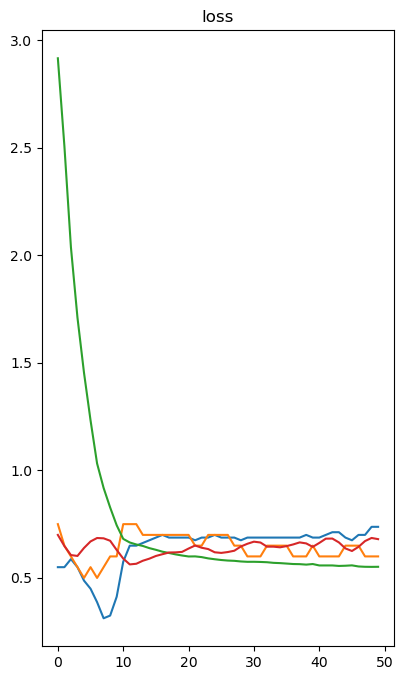

In [36]:
plot_histories(history)

In [37]:
from sklearn.metrics import classification_report, accuracy_score,f1_score,recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

def evaluations(y_test,pred_labels):
    acc = accuracy_score(y_test,pred_labels)
    prec = precision_score(y_test,pred_labels)
    f1 = f1_score(y_test,pred_labels)
    recall = recall_score(y_test,pred_labels)
    print(f'accuracy: {acc:.2f}, precision: {prec:.2f}, f1 score: {f1:.2f}, recall: {recall:.2f}')

In [38]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 98ms/step - loss: 0.6803 - accuracy: 0.6000


[0.6802778244018555, 0.6000000238418579]

In [39]:
predictions = model.predict(norm_X_test)
pred_labels = [int(round(x[0])) for x in predictions]

evaluations(y_test,pred_labels)

1/1 [==============================] - 0s 206ms/step
accuracy: 0.70, precision: 0.45, f1 score: 0.62, recall: 1.00


Text(0.5, 1.0, 'Confusion matrix of unnormalized model')

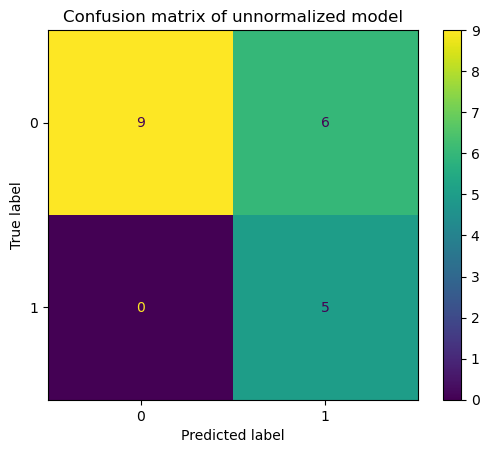

In [40]:
cm = confusion_matrix(y_test,pred_labels)
cm
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion matrix of unnormalized model')

In [41]:
print(classification_report(y_test, pred_labels, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        15
           1       0.45      1.00      0.62         5

    accuracy                           0.70        20
   macro avg       0.73      0.80      0.69        20
weighted avg       0.86      0.70      0.72        20



In [42]:
# baseline model
model1 = Sequential([
    Dense(9),
    Dense(18,activation='relu'), #18 neurons, ReLU activation function
    Dense(18,activation='relu'), #18 neurons, ReLU activation function
    Dense(9,activation='relu'), #9 neurons, ReLU activation function
    Dense(1,activation='sigmoid') #1 output neuron, sigmoid activation function for binary classification
])

model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history1 = model1.fit(norm_X_train,y_train,validation_data=[norm_X_test,y_test],
          epochs = 50)

Epoch 1/50
3/3 [==============================] - 3s 190ms/step - loss: 0.7008 - accuracy: 0.4000 - val_loss: 0.7045 - val_accuracy: 0.3500
Epoch 2/50
3/3 [==============================] - 0s 36ms/step - loss: 0.6962 - accuracy: 0.4500 - val_loss: 0.6995 - val_accuracy: 0.3500
Epoch 3/50
3/3 [==============================] - 0s 39ms/step - loss: 0.6925 - accuracy: 0.5000 - val_loss: 0.6950 - val_accuracy: 0.4500
Epoch 4/50
3/3 [==============================] - 0s 35ms/step - loss: 0.6892 - accuracy: 0.6000 - val_loss: 0.6915 - val_accuracy: 0.6500
Epoch 5/50
3/3 [==============================] - 0s 32ms/step - loss: 0.6862 - accuracy: 0.6500 - val_loss: 0.6887 - val_accuracy: 0.7000
Epoch 6/50
3/3 [==============================] - 0s 37ms/step - loss: 0.6836 - accuracy: 0.6875 - val_loss: 0.6863 - val_accuracy: 0.7000
Epoch 7/50
3/3 [==============================] - 0s 31ms/step - loss: 0.6810 - accuracy: 0.7250 - val_loss: 0.6838 - val_accuracy: 0.7000
Epoch 8/50
3/3 [==========

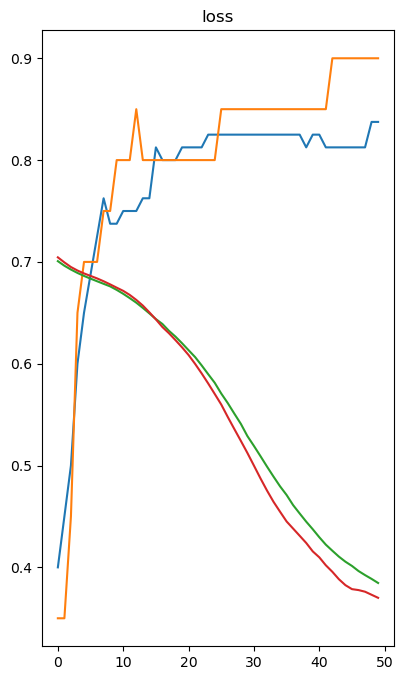

In [43]:
plot_histories(history1)

In [44]:
model1.evaluate(norm_X_test,y_test)

1/1 [==============================] - 0s 51ms/step - loss: 0.3701 - accuracy: 0.9000


[0.3700989782810211, 0.8999999761581421]

In [45]:
predictions = model1.predict(norm_X_test)
pred_labels = [int(round(x[0])) for x in predictions]

evaluations(y_test,pred_labels)

1/1 [==============================] - 0s 174ms/step
accuracy: 0.90, precision: 1.00, f1 score: 0.75, recall: 0.60


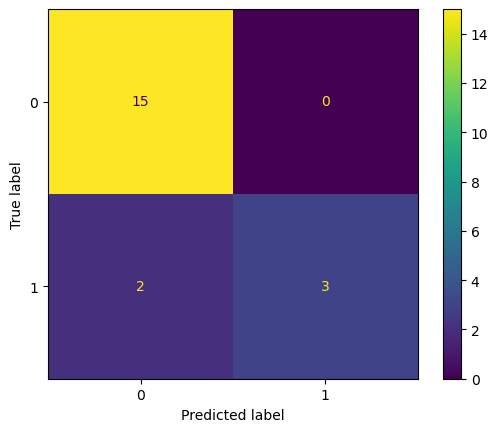

In [46]:
cm = confusion_matrix(y_test,pred_labels)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [47]:
print(classification_report(y_test,pred_labels))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.60      0.75         5

    accuracy                           0.90        20
   macro avg       0.94      0.80      0.84        20
weighted avg       0.91      0.90      0.89        20



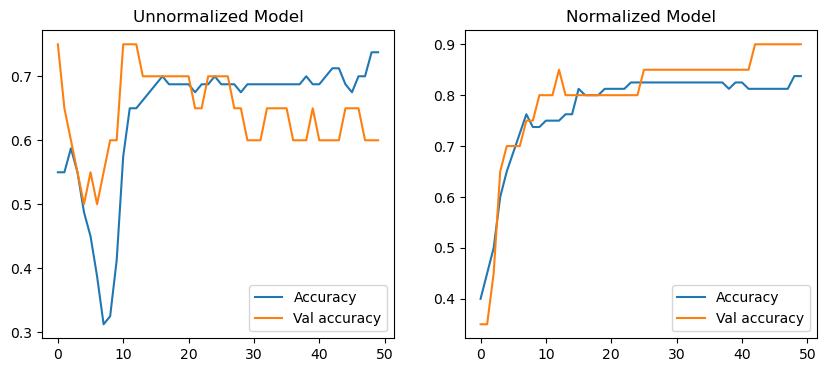

In [48]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Unnormalized Model')
plt.legend(['Accuracy','Val accuracy'])

plt.subplot(1,2,2)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Normalized Model')
plt.legend(['Accuracy','Val accuracy'])

<Axes: >

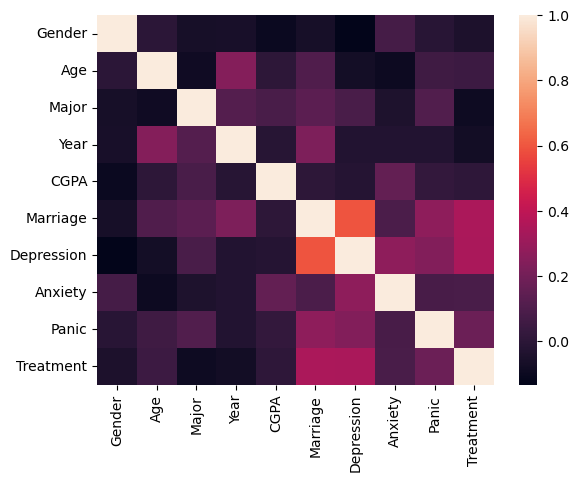

In [49]:
sns.heatmap(df.corr())

Text(0.5, 1.0, "Features' correlation to the Depression")

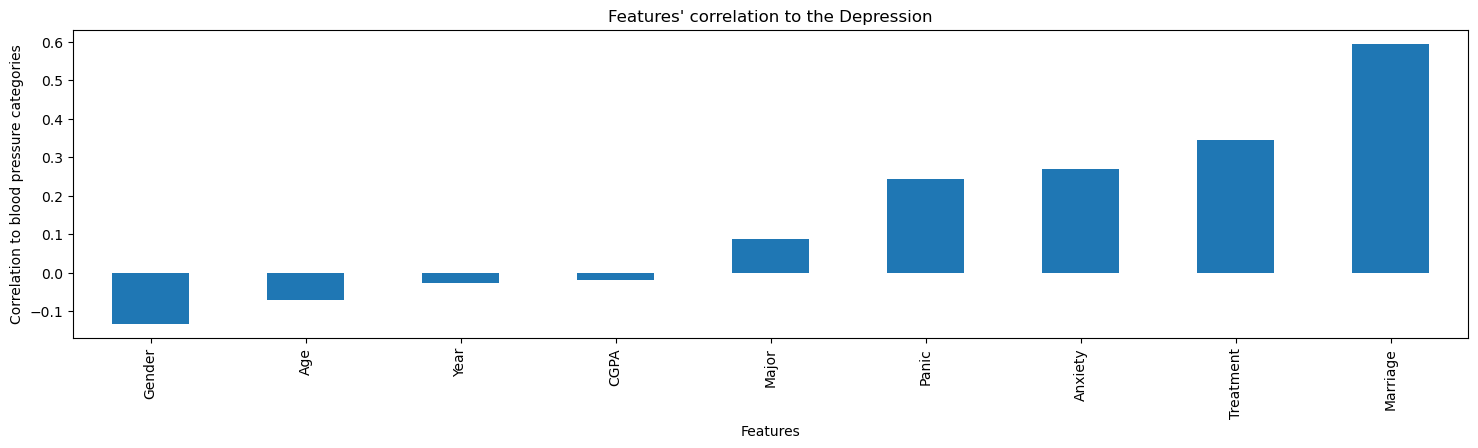

In [50]:
plt.figure(figsize=(18,4))
df.corr()['Depression'].sort_values(ascending = True)[:-1].plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation to blood pressure categories')
plt.title('Features\' correlation to the Depression')